## Name: Manthan Shirsat
## Roll no : 64
## Exp:03

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
X=np.array([1,2,3]).reshape(-1,1)
y=np.array([2,3,5])

In [3]:
model =LinearRegression()
model.fit(X,y)

LinearRegression()

In [4]:
w=model.coef_[0]
b=model.intercept_

In [5]:
print(f"w(slope)={w}")
print(f"b(intercept)={b}")

w(slope)=1.4999999999999993
b(intercept)=0.3333333333333348


In [6]:
y_pred=model.predict(X)

In [7]:
print("\nPRedictions for training data:")

for xi,yi,ypi in zip(X.flatten(),y,y_pred):
    print(f"X={xi},Actual Sales={yi},Predicted Sales={ypi:.2f}")





PRedictions for training data:
X=1,Actual Sales=2,Predicted Sales=1.83
X=2,Actual Sales=3,Predicted Sales=3.33
X=3,Actual Sales=5,Predicted Sales=4.83


In [8]:
mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)


print(f"nMean Squared Error(MSE)= {mse:.4f}")

print (f"R² Score = {r2:.4f}")

nMean Squared Error(MSE)= 0.0556
R² Score = 0.9643


In [9]:
from scipy.optimize import minimize
X = np.array([1,2,3])
y= np.array([2,3,5])

In [10]:
def neg_log_likelihood(params):
    w,b = params
    sigma2 =1
    y_pred = w*X + b
    nll = 0.5* np.sum((y-y_pred)**2/ sigma2)
    return nll

initial_guess = [0,0]

result = minimize(neg_log_likelihood,initial_guess)

w_mle,b_mle = result.x

print (f"MLE w ={w_mle}")

print (F"MLE b = {b_mle}")

MLE w =1.500000003897125
MLE b = 0.3333333918730798


In [11]:
y_pred = w_mle * X + b_mle
print ("\n Prediction for training data:")
for xi, yi,ypi in zip (X,y,y_pred):
    print ( f"X={xi},Actual={yi},Predicted={ypi:.2f}")


 Prediction for training data:
X=1,Actual=2,Predicted=1.83
X=2,Actual=3,Predicted=3.33
X=3,Actual=5,Predicted=4.83


In [12]:
mse= mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

print(f"\nMean Squared Error (MSE) = {mse:.4f}")
print(f"R² Score = {r2:.4f}")


Mean Squared Error (MSE) = 0.0556
R² Score = 0.9643


GD

In [13]:
# Gradient Descent
w,b = 0,0
alpha = 0.0001
n_iter = 1000
n = len(X)

In [14]:
for i in range (n_iter):
    y_pred = w*X.flatten()+b
    dw=(-2/n)*np.sum(X.flatten()*(y-y_pred))
    db= (-2/n)* np.sum(y-y_pred)
    w-=alpha*dw
    b-= alpha*db
print("slope(w):",w)
print("intercept(b):",b)

slope(w): 0.9277932204091286
intercept(b): 0.4003820339618283


In [15]:
y_pred = w*X+b
print ("\nPrediction for training data:")
for xi, yi,ypi in zip (X,y,y_pred):
    print ( f"X={xi},Actual={yi},Predicted={ypi:.2f}")


Prediction for training data:
X=1,Actual=2,Predicted=1.33
X=2,Actual=3,Predicted=2.26
X=3,Actual=5,Predicted=3.18


In [16]:
mse= mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

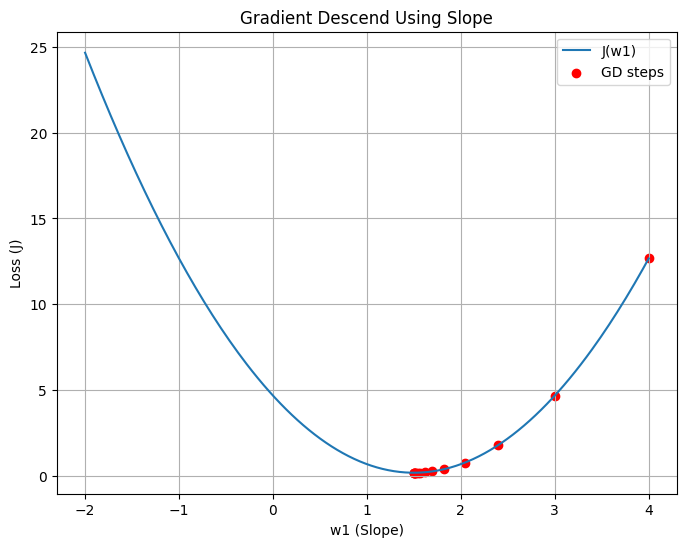

In [18]:
X= np.array ([1,2,3])
y= np.array ([2,3,5])
n=len(X)

def loss(w1):
    w0 = np.mean(y) - w1 * np.mean(X)
    y_pred = w1*X+w0
    return np.sum((y - y_pred)**2)


def gradient(w1):
    w0= np.mean(y) - w1 *np.mean(X)
    y_pred = w1*X+w0
    return -2 * np.sum(X*(y - y_pred))

lr=0.1
w1=4
iterations =15

w1_values =[]
loss_values=[]

for i in range (iterations):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 = w1 - lr*grad

w_space = np.linspace(-2,4,200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize=(8,6))
plt.plot(w_space, loss_space, label="J(w1)")
plt.scatter(w1_values, loss_values, color = "red", label="GD steps")
plt.xlabel("w1 (Slope)")
plt.ylabel("Loss (J)")
plt.title("Gradient Descend Using Slope")
plt.legend()
plt.grid(True)
plt.show()